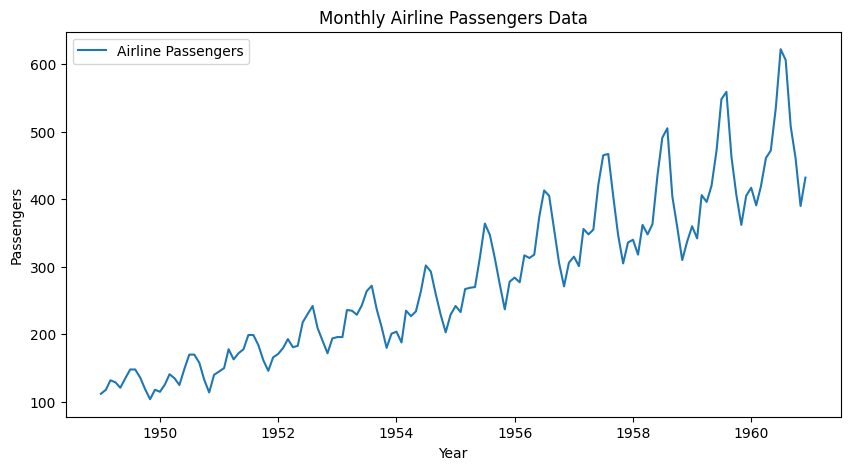

ADF Test p-value: 0.991880243437641


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Mon, 31 Mar 2025   AIC                           1353.347
Time:                        04:13:11   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -503.024
Date:                              Mon, 31 Mar 2025   AIC                           1020.048
Time:                                      04:13:18   BIC                           1040.174
Sample:                                  01-01-1949   HQIC                          1028.226
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4441      0.388      1.145      0.252      -0.316       1.204
ar.L2          0.32

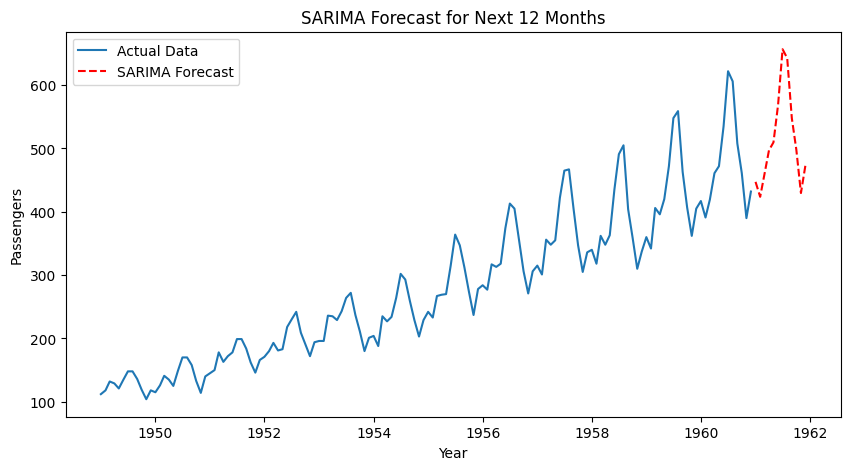

SARIMA RMSE: 36.77


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Visualize the Data
plt.figure(figsize=(10,5))
plt.plot(data, label="Airline Passengers")
plt.title("Monthly Airline Passengers Data")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Check Stationarity using Augmented Dickey-Fuller (ADF) Test
adf_test = adfuller(data['Passengers'])
print(f"ADF Test p-value: {adf_test[1]}")  # If p-value > 0.05, data is non-stationary

# Differencing to Make Data Stationary (if needed)
data_diff = data.diff().dropna()

# Fit ARIMA Model (p=2, d=1, q=2 as an example)
arima_model = ARIMA(data, order=(2,1,2))
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Fit SARIMA Model (p,d,q) × (P,D,Q,m) where m=12 (seasonality)
sarima_model = SARIMAX(data, order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

# Forecasting with SARIMA
forecast = sarima_fit.forecast(steps=12)
plt.figure(figsize=(10,5))
plt.plot(data, label="Actual Data")
plt.plot(forecast, label="SARIMA Forecast", linestyle='dashed', color='red')
plt.title("SARIMA Forecast for Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Model Evaluation (RMSE)
rmse = np.sqrt(mean_squared_error(data['Passengers'][-12:], forecast))
print(f"SARIMA RMSE: {rmse:.2f}")
